In [6]:
# Import the necessary packages
import math

import matplotlib.pyplot as plt

In [7]:
# local module for linear algebra
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

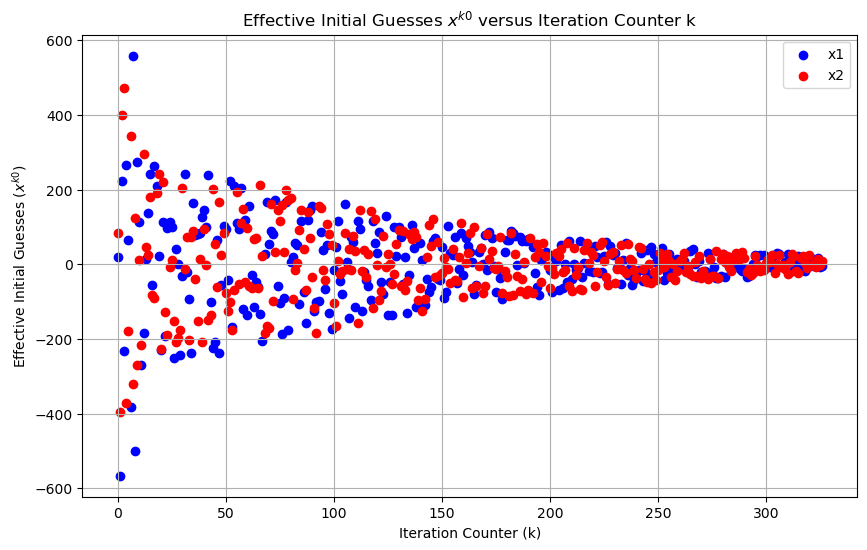

Optimal Solution:
x1 = -1.1769854771523803e-08
x2 = 9.2209961576217e-10
Minimum value of the Griewank function: 1.1102230246251565e-16


In [8]:
from opg3py import * 

# Bounds for x1 and x2
bounds = [-600, 600]

# Tolerance
tolerance = 10**(-8)

# Number of warm-up iterations and maximum iterations
warmup_iterations = 10
max_iterations = 1000

# Call the refined global optimizer function
optimal_solution, initial_guesses = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)

# Plotting the effective initial guesses x^k0 versus iteration counter k
x0_list = np.array(initial_guesses)
x1 = x0_list[:, 0]
x2 = x0_list[:, 1]
k = np.arange(len(x0_list))

plt.figure(figsize=(10, 6))
plt.scatter(k, x1, c='b', label='x1')
plt.scatter(k, x2, c='r', label='x2')
plt.xlabel('Iteration Counter (k)')
plt.ylabel('Effective Initial Guesses ($x^{k0}$)')
plt.title('Effective Initial Guesses $x^{k0}$ versus Iteration Counter k')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal Solution:")
print("x1 =", optimal_solution[0])
print("x2 =", optimal_solution[1])
print("Minimum value of the Griewank function:", griewank(optimal_solution))

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

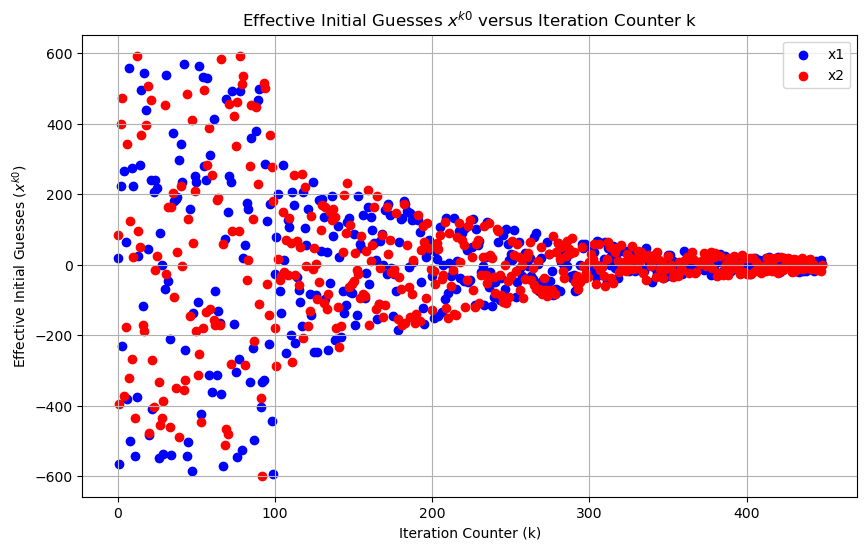

Optimal Solution:
x1 = -6.1916133705835674e-09
x2 = -1.0628516137178177e-08
Minimum value of the Griewank function: 0.0


In [9]:
# Number of warm-up iterations and maximum iterations
warmup_iterations = 100
max_iterations = 1000

# Call the refined global optimizer function
optimal_solution, initial_guesses = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)

# Plotting the effective initial guesses x^k0 versus iteration counter k
x0_list = np.array(initial_guesses)
x1 = x0_list[:, 0]
x2 = x0_list[:, 1]
k = np.arange(len(x0_list))

plt.figure(figsize=(10, 6))
plt.scatter(k, x1, c='b', label='x1')
plt.scatter(k, x2, c='r', label='x2')
plt.xlabel('Iteration Counter (k)')
plt.ylabel('Effective Initial Guesses ($x^{k0}$)')
plt.title('Effective Initial Guesses $x^{k0}$ versus Iteration Counter k')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal Solution:")
print("x1 =", optimal_solution[0])
print("x2 =", optimal_solution[1])
print("Minimum value of the Griewank function:", griewank(optimal_solution))

It can be seen, that the convergence is slower when the number of warm-up iterations is 100 compared to 10. 